<a href="https://colab.research.google.com/github/Suhas-S63/Machine_Learning_Lab_T1/blob/main/Lab1_Suhas_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df = df[['CreditScore','Geography','Gender','Tenure','HasCrCard','IsActiveMember','Exited']]
df


,CreditScore,Geography,Gender,Tenure,HasCrCard,IsActiveMember,Exited
0,228,0,0,2,1,1,1
1,217,2,0,1,0,1,0
2,111,0,0,8,1,0,1
3,308,0,0,1,0,0,0
4,459,2,0,2,1,1,0
...,...,...,...,...,...,...,...
9995,380,0,1,5,1,0,0
9996,125,0,1,10,1,1,0
9997,318,0,0,7,0,1,1
9998,381,1,1,3,1,0,1


In [ ]:
df.isnull().sum()

CreditScore       0
Geography         0
Gender            0
Tenure            0
HasCrCard         0
IsActiveMember    0
Exited            0
dtype: int64

In [ ]:
df.describe()

,CreditScore,Geography,Gender,Tenure,HasCrCard,IsActiveMember,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,259.584600,0.746300,0.545700,5.012800,0.70550,0.515100,0.203700
std,96.496107,0.827529,0.497932,2.892174,0.45584,0.499797,0.402769
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,193.000000,0.000000,0.000000,3.000000,0.00000,0.000000,0.000000
50%,261.000000,0.000000,1.000000,5.000000,1.00000,1.000000,0.000000
75%,327.000000,1.000000,1.000000,7.000000,1.00000,1.000000,0.000000
max,459.000000,2.000000,1.000000,10.000000,1.00000,1.000000,1.000000


Checking for outliers

<Axes: >

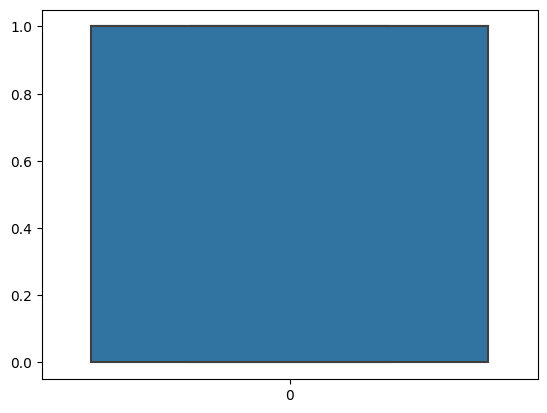

In [ ]:
sns.boxplot(df['HasCrCard'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,CreditScore,Geography,Gender,Tenure,HasCrCard,IsActiveMember,Exited
0,228,0,0,2,1,1,1
1,217,2,0,1,0,1,0
2,111,0,0,8,1,0,1
3,308,0,0,1,0,0,0
4,459,2,0,2,1,1,0


Feature Selection

In [ ]:
from sklearn.feature_selection import chi2
x = df.drop(columns=['Exited'])
y = df['Exited']

In [ ]:
chi_scores = chi2(x,y)
chi_scores

(array([2.42499793e+02, 1.18532506e+01, 5.15399263e+01, 3.27053797e+00,
        1.50040970e-01, 1.18199414e+02]),
 array([1.12111637e-54, 5.75607838e-04, 7.01557451e-13, 7.05344899e-02,
        6.98496209e-01, 1.56803624e-27]))

<Axes: >

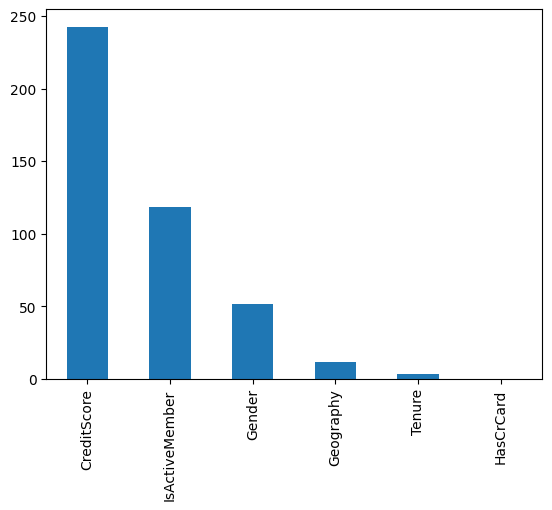

In [ ]:
chi_values=pd.Series(chi_scores[0],index=x.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

<Axes: >

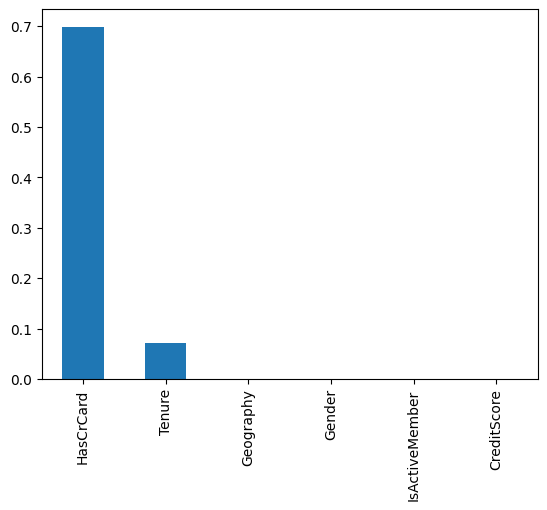

In [ ]:
p_values=pd.Series(chi_scores[1],index=x.columns)
p_values.sort_values(ascending=False,inplace=True)
p_values.plot.bar()

In [ ]:
df['Exited'].value_counts()


0    7963
1    2037
Name: Exited, dtype: int64

<Axes: >

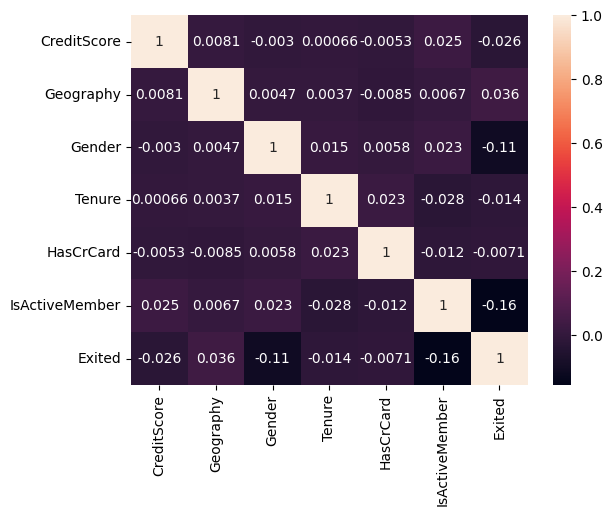

In [ ]:
correlation_mat = df.corr()
sns.heatmap(correlation_mat,annot=True)

Principal Component Analysis

In [ ]:
df.describe()

,CreditScore,Geography,Gender,Tenure,HasCrCard,IsActiveMember,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,259.584600,0.746300,0.545700,5.012800,0.70550,0.515100,0.203700
std,96.496107,0.827529,0.497932,2.892174,0.45584,0.499797,0.402769
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,193.000000,0.000000,0.000000,3.000000,0.00000,0.000000,0.000000
50%,261.000000,0.000000,1.000000,5.000000,1.00000,1.000000,0.000000
75%,327.000000,1.000000,1.000000,7.000000,1.00000,1.000000,0.000000
max,459.000000,2.000000,1.000000,10.000000,1.00000,1.000000,1.000000


In [ ]:
X = df.iloc[:, 0:6].values
y = df.iloc[:, 6].values

In [ ]:
#splitting the data into traning and testing data
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# preprocessing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [ ]:
# applying the PCA component analysis
from sklearn.decomposition import PCA

pca_analysis = PCA(n_components = 2)

X_train = pca_analysis.fit_transform(Xtrain)
X_test = pca_analysis.transform(Xtest)

variance = pca_analysis.explained_variance_ratio_

In [ ]:
#Applying Logistic Regression
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(Xtrain, ytrain)

LogisticRegression(random_state=0)

In [ ]:
# Prediction of test set result
y_prediction = classifier.predict(Xtest)

Creating a confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest,y_prediction)

Visualising Both training and test set results with scatterplot

In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

X_set, y_set = Xtrain, ytrain
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                               stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1,
                               stop=X_set[:, 1].max() + 1, step=0.01))

# Predict the class labels for each point in the mesh grid
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)

# Create a colormap for the decision regions
cmap_decision = ListedColormap(['yellow', 'white', 'aquamarine'])

# Create a colormap for the scatter points
cmap_scatter = ListedColormap(['red', 'green', 'blue'])

plt.contourf(X1, X2, Z, alpha=0.75, cmap=cmap_decision)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=cmap_scatter(i), label=j)

plt.title('Logistic Regression on Training Set')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.show()

ValueError: ignored

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = Xtest, ytest

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
             X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)

plt.title('Logistic Regression on Test Set')
plt.xlabel('PC1') # showing X label
plt.ylabel('PC2') # showing Y label
plt.legend()

plt.show()